In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

https://stackoverflow.com/questions/78694374/fitting-ode-to-elements-in-graph

In [2]:
def dose(t, y, b, s, c, p, d):
    target, infectious, virus = y
    return np.array([
        -b * target * virus,
        b * target * virus - s * infectious,
        (1. / (d + 1.)) * p * infectious - c * virus
    ])

In [3]:
def model(D, b, s, c, p):
    solutions = []
    for d in D:
        solution = integrate.solve_ivp(
            dose, [0, 5], y0=[1, 0, 0.01],
            t_eval=[2.8828828828828827],  # np.linspace(0, 60, 1000)[48]
            args=(b, s, c, p, d)
        )
        data = solution.y[2, 0] / 0.01950269536785707
        solutions.append(data)
    return np.array(solutions)

In [8]:
b = 0.00001
s = 4
c = 4
p = 2000000
p0 = (b, s, c, p)

np.random.seed(12345)
D = np.logspace(-3, 3, 20)
z = model(D, b, s, c, p)
s = np.ones_like(z) * 0.05
n = s * np.random.normal(size=s.size) * z
zn = z + n

In [5]:
popt, pcov = optimize.curve_fit(
    model, D, z, p0=[1e-5, 1, 1, 1e6],
    method="trf", bounds=(0, np.inf),
    sigma=s, absolute_sigma=True
)

In [6]:
popt, pcov

(array([1.98458777e-05, 3.39383754e+00, 4.55115392e+00, 1.00007348e+06]),
 array([[ 8.35308599e-10, -3.25230641e-03,  3.73469971e-03,
         -5.22169803e-11],
        [-3.25230641e-03,  1.28672442e+04, -1.47634805e+04,
          2.06436797e-04],
        [ 3.73469971e-03, -1.47634805e+04,  1.69398903e+04,
         -2.36868204e-04],
        [-5.22169803e-11,  2.06436797e-04, -2.36868204e-04,
          3.31209815e-12]]))

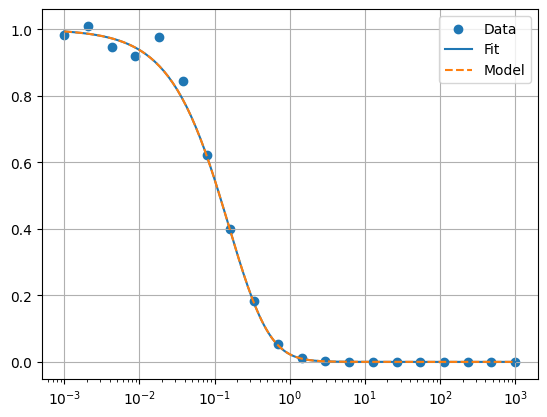

In [11]:
Dlog = np.logspace(-3, 3, 200)
fig, axe = plt.subplots()
axe.scatter(D, zn, label="Data")
axe.semilogx(Dlog, model(Dlog, *popt), label="Fit")
axe.semilogx(Dlog, model(Dlog, *p0), "--", label="Model")
axe.legend()
axe.grid()